# Optimization with Genetic Algorithms

## Load TSP problem + display basic info

In [1]:
import tsplib95
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


# load TSP problem 
problem = tsplib95.load('./datasets/gr17.tsp') 

# display basic info
problem_name = problem.name
num_nodes = problem.dimension
edge_weight_type = problem.edge_weight_type

print("Problem Name:", problem_name)
print("Number of Nodes:", num_nodes)
print("Edge Weight Type:", edge_weight_type)



Problem Name: gr17
Number of Nodes: 17
Edge Weight Type: EXPLICIT


## Genetic Algorithm Framework

### Chromosome Representation

In [2]:
import random

def create_chromosome(cities):
    chromosome = cities.copy()
    random.shuffle(chromosome)
    return chromosome


# gets the list of cities from the TSP problem
cities = list(problem.get_nodes())
# creates a chromosome
chromosome = create_chromosome(cities)

print("Chromosome (Tour):", chromosome)


Chromosome (Tour): [4, 9, 3, 13, 15, 16, 6, 12, 1, 14, 8, 0, 7, 5, 10, 2, 11]


### Fitness Function

In [3]:
def calculate_total_distance(solution, problem):
    distance = 0
    for i in range(len(solution) - 1):
        # Adjust indices for zero-based indexing
        distance += problem.get_weight(solution[i] - 1, solution[i + 1] - 1)
    # Include distance from the last city back to the first
    distance += problem.get_weight(solution[-1] - 1, solution[0] - 1)
    return distance

# # example
# chromosome = create_chromosome(cities) # function to create chromosome (from section above)
# fitness = calculate_total_distance(chromosome, problem)

# print("Total distance of the tour:", fitness)


## Genetic Operators

### Selection

They are also available with external tools like deep

In [4]:

def roulette_wheel_selection(population, fitnesses):
    total_fitness = sum(fitnesses)
    pick = random.uniform(0, total_fitness)
    current = 0
    for chromosome, fitness in zip(population, fitnesses):
        current += fitness
        if current > pick:
            return chromosome


In [5]:
def tournament_selection(population, k, problem):
    selected_parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, k)
        best_solution = min(tournament, key=lambda x: calculate_total_distance(x, problem))
        selected_parents.append(best_solution)
    return selected_parents

In [6]:
# # TEST FOUR ROULETTE WHEEL SELECTION

# # Sample population and fitnesses
# population = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# fitnesses = [10, 20, 30]  # Example fitness values

# # Testing the selection multiple times
# for _ in range(10):
#     selected = roulette_wheel_selection(population, fitnesses)
#     print("Selected chromosome:", selected)


### Crossover

In [7]:
def partial_mapped_crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    mapping1 = {parent1[i]: parent2[i] for i in range(start, end)}
    mapping2 = {parent2[i]: parent1[i] for i in range(start, end)}
    child1 = [mapping1.get(city, city) for city in parent1]
    child2 = [mapping2.get(city, city) for city in parent2]
    return child1, child2

In [8]:
def ordered_crossover(parent1, parent2):

    size = len(parent1)
    child1, child2 = [-1] * size, [-1] * size

    # select a crossover point range
    start, end = sorted(random.sample(range(size), 2))

    # copy from first parent to first child
    child1[start:end] = parent1[start:end]

    # fill remaining with genes for second parent
    p2_index = 0
    for i in range(size):
        if child1[i] == -1:
            while parent2[p2_index] in child1:
                p2_index += 1
            child1[i] = parent2[p2_index]

    # same process for 2nd child
    child2[start:end] = parent2[start:end]
    p1_index = 0
    for i in range(size):
        if child2[i] == -1:
            while parent1[p1_index] in child2:
                p1_index += 1
            child2[i] = parent1[p1_index]

    return child1, child2


In [9]:
# #TEST FOR PARTIAL MAPPED CROSSOVER

# # Parent chromosomes
# parent1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# parent2 = [9, 8, 7, 6, 5, 4, 3, 2, 1]

# # Apply PMX
# child1, child2 = partial_mapped_crossover(parent1, parent2)
# print("Parent1:", parent1)
# print("Parent2:", parent2)
# print("Child1:", child1)
# print("Child2:", child2)


### Mutation

In [10]:
def swap_mutation(chromosome):
    idx1, idx2 = random.sample(range(len(chromosome)), 2)
    chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome


In [11]:
def inversion_mutation(chromosome):
    start, end = sorted(random.sample(range(len(chromosome)), 2))
    chromosome[start:end + 1] = reversed(chromosome[start:end + 1])
    return chromosome


In [12]:
# #TEST FOR SWAP MUTATION

# # Sample chromosome
# chromosome = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# # Apply scramble mutation
# mutated = swap_mutation(chromosome.copy())
# print("Original:", chromosome)
# print("Mutated:", mutated)


## Algorithm Initialization

### Population Initialization

In [13]:
def initialize_population(population_size, num_cities):
    return [random.sample(range(1, num_cities + 1), num_cities) for _ in range(population_size)]



### Parameters Setup

In [14]:
# Genetic Algorithm param


# reason: a larger population can explore the search space more thoroughly but increases computational cost(100 is still ok).
population_size = 100


# reason: higher rates increase the genetic diversity of the population, but too high a rate can deny good solutions.
crossover_rate = 0.2

# reason: needed to introduce new genetic material into the population, but should be low to avoid random search.
mutation_rate = 0.8

# reason: more generations allow more time for the algorithm to improve solutions, but also increase computational time.
num_generations = 500

# display
print("Population Size:", population_size)
print("Crossover Rate:", crossover_rate)
print("Mutation Rate:", mutation_rate)
print("Number of Generations:", num_generations)



Population Size: 100
Crossover Rate: 0.2
Mutation Rate: 0.8
Number of Generations: 500


## Main Loop of the Genetic Algorithm

Generation 0/500: Best Distance = 3074


Generation 50/500: Best Distance = 2142
Generation 100/500: Best Distance = 2196
Generation 150/500: Best Distance = 2136
Generation 200/500: Best Distance = 2160
Generation 250/500: Best Distance = 2131
Generation 300/500: Best Distance = 2120
Generation 350/500: Best Distance = 2090
Generation 400/500: Best Distance = 2165
Generation 450/500: Best Distance = 2116
Generation 499/500: Best Distance = 2136
Best Solution: [10, 15, 14, 17, 7, 13, 4, 9, 12, 16, 1, 8, 6, 3, 11, 5, 2]
Best Distance: 2136


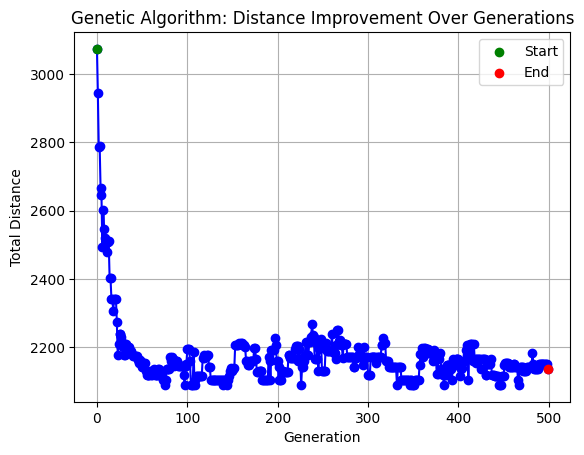

In [15]:
def genetic_algorithm_main_loop(population_size, generations, crossover_rate, mutation_rate):
    num_cities = problem.dimension
    
    population = initialize_population(population_size, num_cities)

    best_distances = []

    for generation in range(generations):
        selected_parents = tournament_selection(population, k=5, problem=problem)
        offspring = []

        for i in range(len(selected_parents) // 2):
            parent1, parent2 = selected_parents[i], selected_parents[i + 1]
            if random.random() < crossover_rate:
                child1, child2 = ordered_crossover(parent1, parent2)
            else:
                child1, child2 = parent1[:], parent2[:]
            if random.random() < mutation_rate:
                child1 = swap_mutation(child1)
            if random.random() < mutation_rate:
                child2 = inversion_mutation(child2)

            offspring.extend([child1, child2])

        population = offspring

        best_solution = min(population, key=lambda x: calculate_total_distance(x, problem))
        best_distance = calculate_total_distance(best_solution, problem)
        best_distances.append(best_distance)

        if generation % (generations // 10) == 0 or generation == generations - 1:
            print(f"Generation {generation}/{generations}: Best Distance = {best_distance}")

            
    return best_solution, best_distance, best_distances


best_solution, best_distance, best_distances = genetic_algorithm_main_loop(population_size, num_generations, crossover_rate, mutation_rate)

# print results and plot
print("Best Solution:", best_solution)
print("Best Distance:", best_distance)


# Line plot with markers
plt.plot(range(len(best_distances)), best_distances, marker='o', linestyle='-', color='blue')

# Highlight starting and ending points
plt.scatter(0, best_distances[0], color='green', label='Start', zorder=5)  # Start point
plt.scatter(len(best_distances) - 1, best_distances[-1], color='red', label='End', zorder=5)  # End point

# Labels and Title
plt.xlabel("Generation")
plt.ylabel("Total Distance")
plt.title("Genetic Algorithm: Distance Improvement Over Generations")

# Grid and Legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()



## Experimentation with Parameters

Running GA with parameter set 1: {'population_size': 150, 'crossover_rate': 0.1, 'mutation_rate': 0.1}
Generation 0/500: Best Distance = 3401
Generation 50/500: Best Distance = 2090
Generation 100/500: Best Distance = 2090
Generation 150/500: Best Distance = 2090
Generation 200/500: Best Distance = 2090
Generation 250/500: Best Distance = 2090
Generation 300/500: Best Distance = 2090
Generation 350/500: Best Distance = 2090
Generation 400/500: Best Distance = 2090
Generation 450/500: Best Distance = 2090
Generation 499/500: Best Distance = 2090


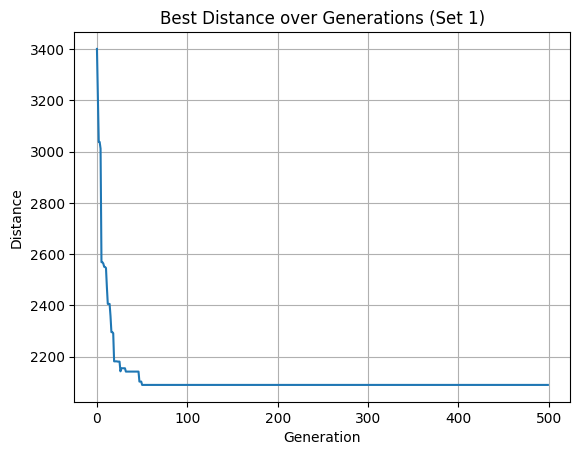

Best solution for set 1: [3, 11, 5, 2, 10, 15, 14, 17, 13, 4, 9, 12, 16, 1, 7, 8, 6]
Best distance for set 1: 2090

Running GA with parameter set 2: {'population_size': 150, 'crossover_rate': 0.6, 'mutation_rate': 0.3}
Generation 0/500: Best Distance = 3576
Generation 50/500: Best Distance = 2159
Generation 100/500: Best Distance = 2159
Generation 150/500: Best Distance = 2159
Generation 200/500: Best Distance = 2159
Generation 250/500: Best Distance = 2159
Generation 300/500: Best Distance = 2159
Generation 350/500: Best Distance = 2159
Generation 400/500: Best Distance = 2159
Generation 450/500: Best Distance = 2159
Generation 499/500: Best Distance = 2159


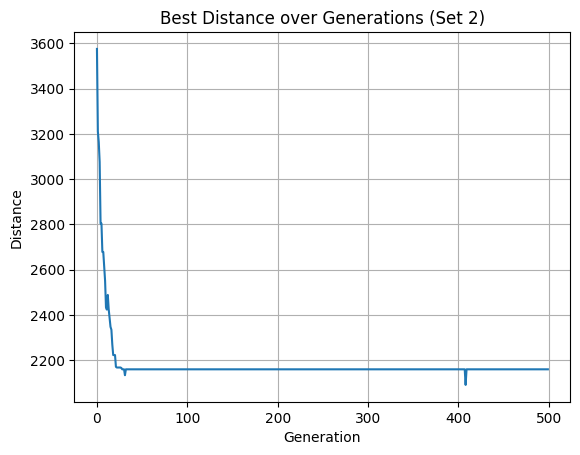

Best solution for set 2: [6, 8, 7, 1, 4, 16, 12, 9, 13, 17, 14, 15, 10, 2, 5, 11, 3]
Best distance for set 2: 2159

Running GA with parameter set 3: {'population_size': 100, 'crossover_rate': 0.8, 'mutation_rate': 0.2}
Generation 0/500: Best Distance = 3136
Generation 50/500: Best Distance = 2095
Generation 100/500: Best Distance = 2095
Generation 150/500: Best Distance = 2095
Generation 200/500: Best Distance = 2095
Generation 250/500: Best Distance = 2095
Generation 300/500: Best Distance = 2095
Generation 350/500: Best Distance = 2095
Generation 400/500: Best Distance = 2095
Generation 450/500: Best Distance = 2095
Generation 499/500: Best Distance = 2095


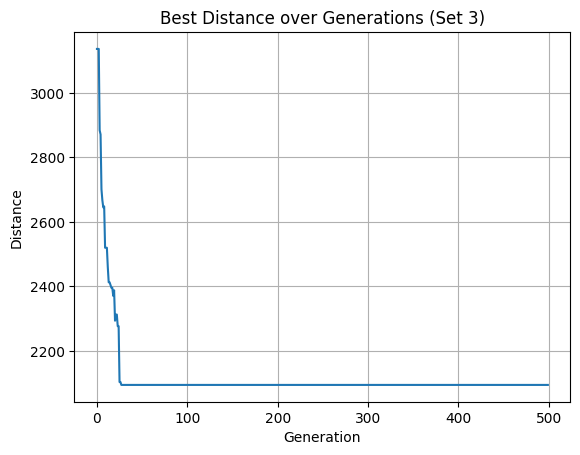

Best solution for set 3: [1, 4, 13, 7, 17, 8, 6, 14, 15, 3, 11, 10, 2, 5, 9, 12, 16]
Best distance for set 3: 2095

Running GA with parameter set 4: {'population_size': 100, 'crossover_rate': 0.4, 'mutation_rate': 0.4}
Generation 0/500: Best Distance = 2885
Generation 50/500: Best Distance = 2090
Generation 100/500: Best Distance = 2090
Generation 150/500: Best Distance = 2090
Generation 200/500: Best Distance = 2090
Generation 250/500: Best Distance = 2090
Generation 300/500: Best Distance = 2090
Generation 350/500: Best Distance = 2090
Generation 400/500: Best Distance = 2090
Generation 450/500: Best Distance = 2090
Generation 499/500: Best Distance = 2090


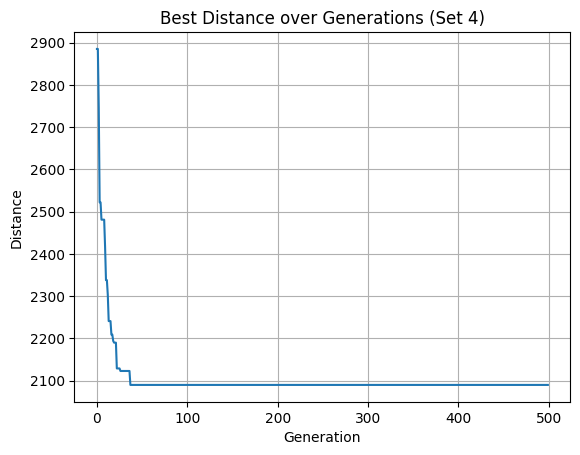

Best solution for set 4: [17, 14, 15, 10, 2, 5, 11, 3, 6, 8, 7, 1, 16, 12, 9, 4, 13]
Best distance for set 4: 2090

Running GA with parameter set 5: {'population_size': 75, 'crossover_rate': 0.2, 'mutation_rate': 0.2}
Generation 0/500: Best Distance = 3807
Generation 50/500: Best Distance = 2176
Generation 100/500: Best Distance = 2103
Generation 150/500: Best Distance = 2090
Generation 200/500: Best Distance = 2090
Generation 250/500: Best Distance = 2090
Generation 300/500: Best Distance = 2090
Generation 350/500: Best Distance = 2090
Generation 400/500: Best Distance = 2090
Generation 450/500: Best Distance = 2090
Generation 499/500: Best Distance = 2090


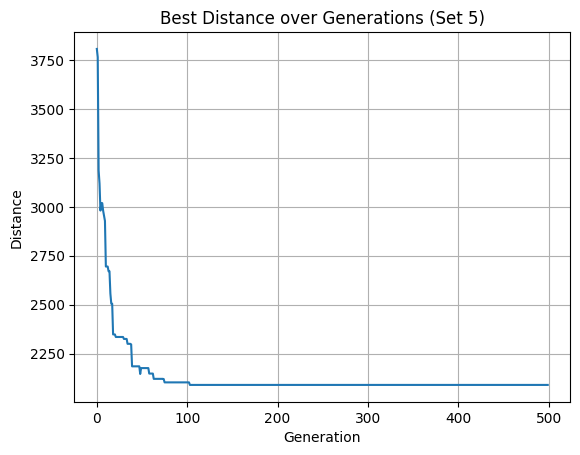

Best solution for set 5: [9, 12, 16, 1, 7, 8, 6, 3, 11, 5, 2, 10, 15, 14, 17, 13, 4]
Best distance for set 5: 2090

Running GA with parameter set 6: {'population_size': 50, 'crossover_rate': 0.9, 'mutation_rate': 0.9}
Generation 0/500: Best Distance = 3203
Generation 50/500: Best Distance = 2570
Generation 100/500: Best Distance = 2693
Generation 150/500: Best Distance = 2706
Generation 200/500: Best Distance = 2444
Generation 250/500: Best Distance = 2434
Generation 300/500: Best Distance = 2414
Generation 350/500: Best Distance = 2314
Generation 400/500: Best Distance = 2624
Generation 450/500: Best Distance = 2728
Generation 499/500: Best Distance = 2507


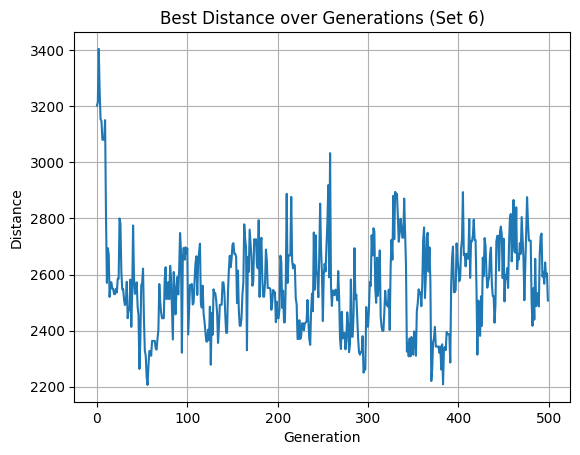

Best solution for set 6: [9, 12, 16, 7, 17, 13, 4, 1, 6, 8, 14, 15, 3, 10, 5, 2, 11]
Best distance for set 6: 2507



In [16]:
# to define different sets of parameters for experimentation
parameter_sets = [
    {"population_size": 150, "crossover_rate": 0.1, "mutation_rate": 0.1},
    {"population_size": 150, "crossover_rate": 0.6, "mutation_rate": 0.3},
    {"population_size": 100, "crossover_rate": 0.8, "mutation_rate": 0.2},
    {"population_size": 100, "crossover_rate": 0.4, "mutation_rate": 0.4},
    {"population_size": 75, "crossover_rate": 0.2, "mutation_rate": 0.2},
    {"population_size": 50, "crossover_rate": 0.9, "mutation_rate": 0.9}
    # ... add more parameter sets for experimentation
]




# the function to run the genetic algorithm with the given parameters
def run_genetic_algorithm_with_params(params):
    best_solution, best_distance, best_distances_per_generation = genetic_algorithm_main_loop(
        params["population_size"], 
        num_generations,
        params["crossover_rate"], 
        params["mutation_rate"], 
    )
    return best_solution, best_distance, best_distances_per_generation

results = []

# running the algorithm with each parameter set and recording results
best_overall_distance = float('inf')
best_overall_solution = None
best_overall_parameter_set = None
all_distances_per_set = {}  # store distances per generation for each parameter set


for i, params in enumerate(parameter_sets):
    print(f"Running GA with parameter set {i + 1}: {params}")
    best_solution, best_distance, distances_per_generation = run_genetic_algorithm_with_params(params)

    results.append((params, best_solution, best_distance))

    all_distances_per_set[i + 1] = distances_per_generation  # store the distances for this parameter set

    if best_distance < best_overall_distance:
        best_overall_distance = best_distance
        best_overall_solution = best_solution
        best_overall_parameter_set = params

    # to plot the performance for this parameter set
    plt.figure()
    plt.plot(distances_per_generation)
    plt.title(f'Best Distance over Generations (Set {i + 1})')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()

    # show the best results for the current set
    print(f"Best solution for set {i + 1}: {best_solution}")
    print(f"Best distance for set {i + 1}: {best_distance}\n")


## Results and Analysis

### Display the Best Solution

In [17]:
print("Best Overall Solution:", best_overall_solution)
print("Best Overall Distance:", best_overall_distance)
print("Achieved with Parameter Set:", best_overall_parameter_set)


Best Overall Solution: [3, 11, 5, 2, 10, 15, 14, 17, 13, 4, 9, 12, 16, 1, 7, 8, 6]
Best Overall Distance: 2090
Achieved with Parameter Set: {'population_size': 150, 'crossover_rate': 0.1, 'mutation_rate': 0.1}


### Parameter Tuning Analysis

Parameter Set 1: {'population_size': 150, 'crossover_rate': 0.1, 'mutation_rate': 0.1}
Best Distance: 2090

Parameter Set 2: {'population_size': 150, 'crossover_rate': 0.6, 'mutation_rate': 0.3}
Best Distance: 2159

Parameter Set 3: {'population_size': 100, 'crossover_rate': 0.8, 'mutation_rate': 0.2}
Best Distance: 2095

Parameter Set 4: {'population_size': 100, 'crossover_rate': 0.4, 'mutation_rate': 0.4}
Best Distance: 2090

Parameter Set 5: {'population_size': 75, 'crossover_rate': 0.2, 'mutation_rate': 0.2}
Best Distance: 2090

Parameter Set 6: {'population_size': 50, 'crossover_rate': 0.9, 'mutation_rate': 0.9}
Best Distance: 2507

Results: [({'population_size': 150, 'crossover_rate': 0.1, 'mutation_rate': 0.1}, [3, 11, 5, 2, 10, 15, 14, 17, 13, 4, 9, 12, 16, 1, 7, 8, 6], 2090), ({'population_size': 150, 'crossover_rate': 0.6, 'mutation_rate': 0.3}, [6, 8, 7, 1, 4, 16, 12, 9, 13, 17, 14, 15, 10, 2, 5, 11, 3], 2159), ({'population_size': 100, 'crossover_rate': 0.8, 'mutation_rate'

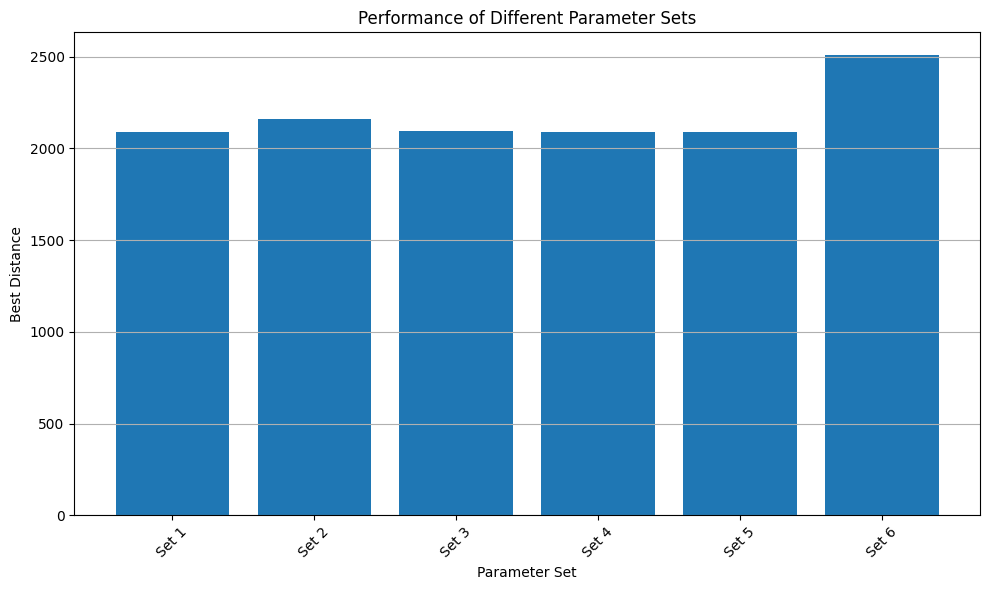

In [18]:


for i, (params, _, best_distance) in enumerate(results):
    print(f"Parameter Set {i + 1}: {params}")
    print(f"Best Distance: {best_distance}\n")

# prepare data for plotting
best_distances = [best_distance for _, _, best_distance in results]

print("Results:", results)
print("Best Distances for Plotting:", best_distances)

# plotting the performance of each parameter set
plt.figure(figsize=(10, 6))  
plt.bar(range(len(results)), best_distances, tick_label=[f"Set {i+1}" for i in range(len(results))])
plt.title('Performance of Different Parameter Sets')
plt.xlabel('Parameter Set')
plt.ylabel('Best Distance')
plt.xticks(rotation=45) 
plt.grid(axis='y') 
plt.tight_layout()  
plt.show()